In [1]:
import numpy as np
import os, sys, threading, csv, cv2, multiprocessing
from PIL import Image
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from concurrent.futures import ThreadPoolExecutor


# root_dir = 'path/ARKitScenes/data/raw'
upsampling_dir = '/mnt/IRONWOLF1/ashkan/data/ARKitScenes/upsampling'

csv_file = './depth_statistics.csv'

In [2]:

num_threads = os.cpu_count()  

print(f'Number of available threads/cores: {num_threads}')

Number of available threads/cores: 32


In [3]:
training_dir_upsampling = os.path.join(upsampling_dir, 'Training')
validation_dir_upsampling = os.path.join(upsampling_dir, 'Validation')

In [4]:
df = pd.read_csv(csv_file)
depth_data = df
# Calculate overall statistics (min, max, percentiles) across the entire dataset
global_min_depth = df['min_depth'].min()
global_max_depth = df['max_depth'].max()

# Calculate percentiles across all samples
percentiles = {
    'percentile_25': df['percentile_25'].mean(),
    'percentile_50': df['percentile_50'].mean(),
    'percentile_75': df['percentile_75'].mean(),
    'percentile_90': df['percentile_90'].mean(),
    'percentile_95': df['percentile_95'].mean(),
    'percentile_99': df['percentile_99'].mean()
}

# Display the overall statistics
global_min_depth, global_max_depth, percentiles


(0.1,
 49.777,
 {'percentile_25': 1.0514798201753401,
  'percentile_50': 1.2544288997511155,
  'percentile_75': 1.4843944987555777,
  'percentile_90': 1.6968124576784234,
  'percentile_95': 1.8149148433821385,
  'percentile_99': 1.9949526525258416})

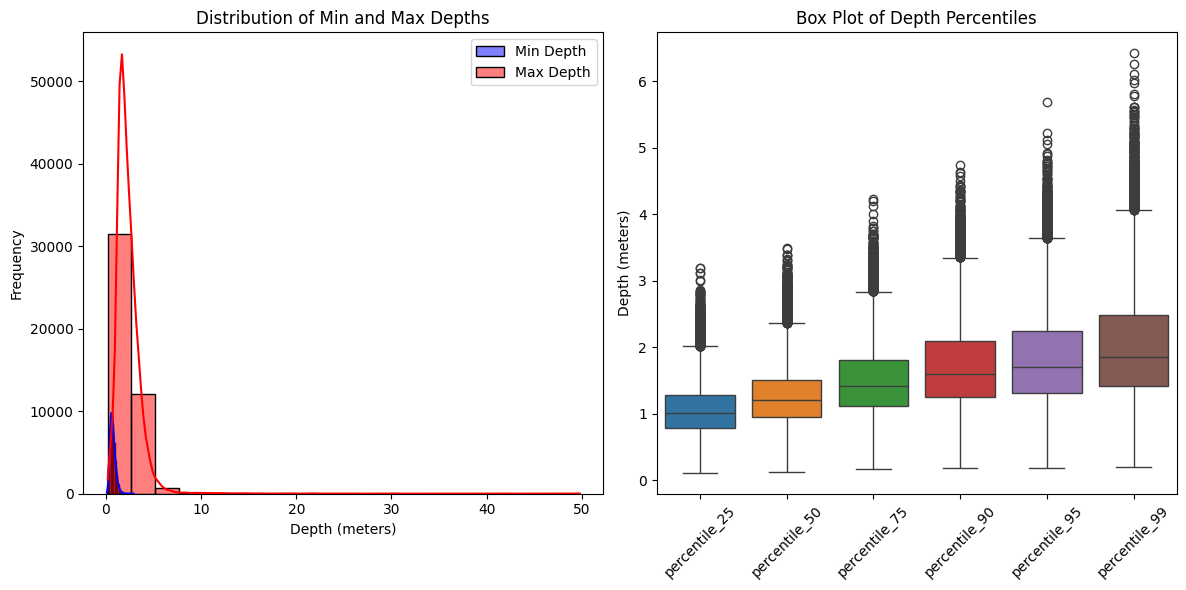

In [5]:
# Set up the plotting environment
plt.figure(figsize=(12, 6))

# Histogram for min_depth and max_depth
plt.subplot(1, 2, 1)
sns.histplot(depth_data['min_depth'], bins=20, kde=True, color='blue', label='Min Depth')
sns.histplot(depth_data['max_depth'], bins=20, kde=True, color='red', label='Max Depth')
plt.title('Distribution of Min and Max Depths')
plt.xlabel('Depth (meters)')
plt.ylabel('Frequency')
plt.legend()

# Box plot for depth percentiles
plt.subplot(1, 2, 2)
percentile_data = depth_data[['percentile_25', 'percentile_50', 'percentile_75', 'percentile_90', 'percentile_95', 'percentile_99']]
sns.boxplot(data=percentile_data)
plt.title('Box Plot of Depth Percentiles')
plt.ylabel('Depth (meters)')
plt.xticks(rotation=45)

# Show plots
plt.tight_layout()
plt.show()

In [20]:
df = pd.read_csv('./arkit_depth_accuracy_results.csv')

rmse_columns = [
    'rmse_0.1-0.5m', 'rmse_0.5-1.0m', 'rmse_1.0-1.5m', 'rmse_1.5-2.0m',
    'rmse_2.0-5.0m', 'rmse_5.0-10.0m', 'rmse_10.0-50.0m'
]

abs_rel_columns = [
    'abs_rel_0.1-0.5m', 'abs_rel_0.5-1.0m', 'abs_rel_1.0-1.5m', 'abs_rel_1.5-2.0m',
    'abs_rel_2.0-5.0m', 'abs_rel_5.0-10.0m', 'abs_rel_10.0-50.0m'
]


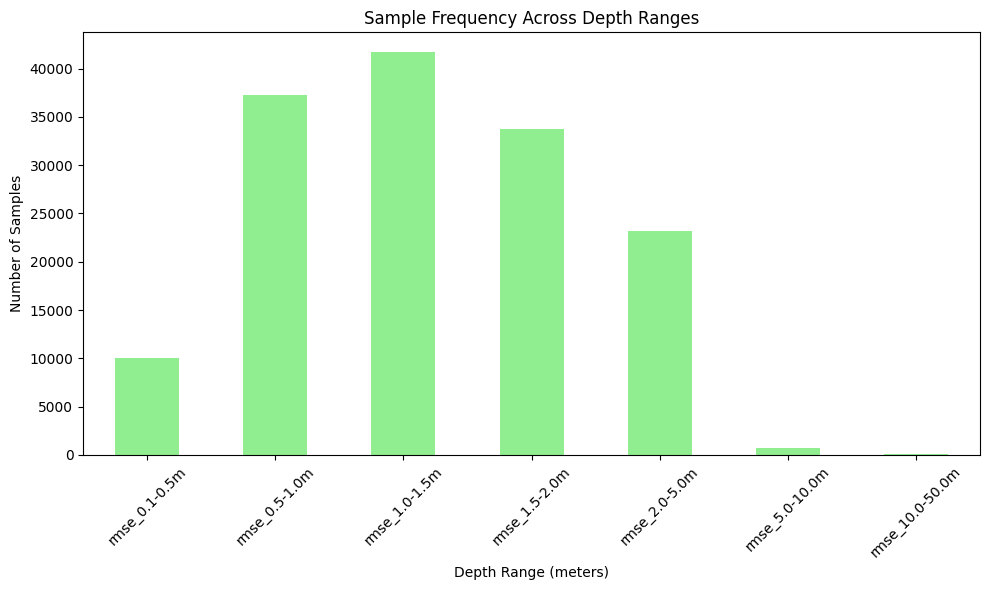

In [21]:
# Let's visualize the data distribution (frequency) across depth ranges.

# Create a new DataFrame to count the non-NaN values in each depth range RMSE column
rmse_count_per_range = df[rmse_columns].count()

# Plot the frequency of samples for each depth range
plt.figure(figsize=(10, 6))
rmse_count_per_range.plot(kind='bar', color='lightgreen')
plt.title('Sample Frequency Across Depth Ranges')
plt.ylabel('Number of Samples')
plt.xlabel('Depth Range (meters)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


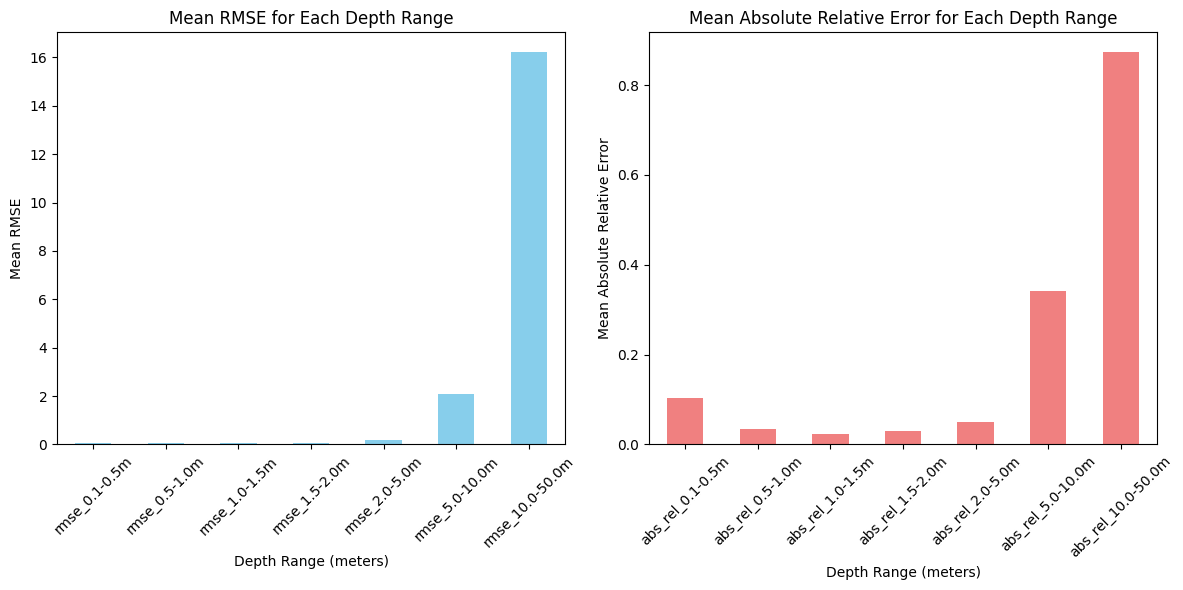

In [9]:


rmse_df = df[rmse_columns]
abs_rel_df = df[abs_rel_columns]

mean_rmse_per_range = rmse_df.mean()
mean_abs_rel_per_range = abs_rel_df.mean()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
mean_rmse_per_range.plot(kind='bar', color='skyblue')
plt.title('Mean RMSE for Each Depth Range')
plt.ylabel('Mean RMSE')
plt.xlabel('Depth Range (meters)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
mean_abs_rel_per_range.plot(kind='bar', color='lightcoral')
plt.title('Mean Absolute Relative Error for Each Depth Range')
plt.ylabel('Mean Absolute Relative Error')
plt.xlabel('Depth Range (meters)')
plt.xticks(rotation=45)

plt.tight_layout()

# Show the plot
plt.show()


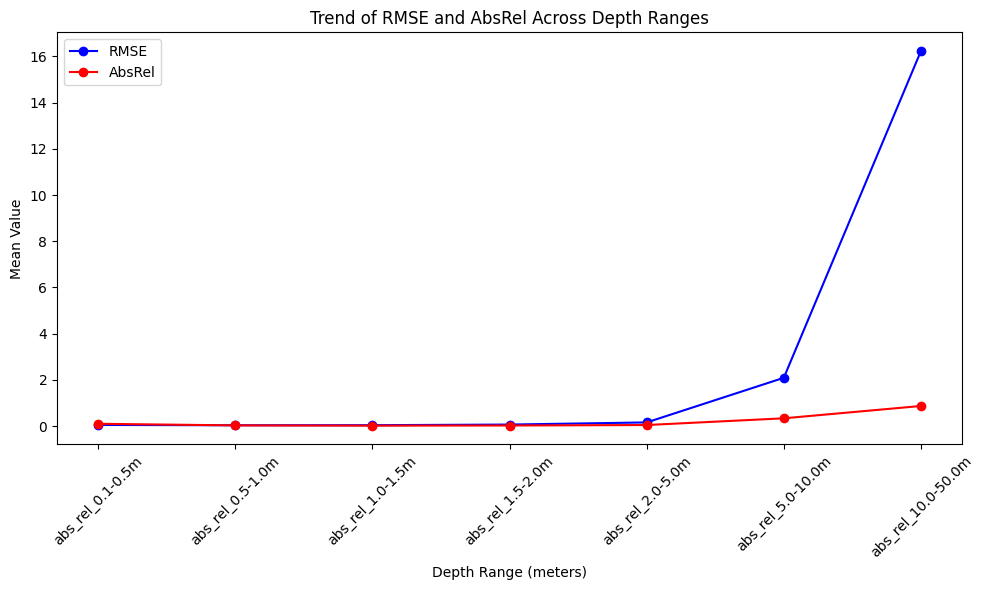

RMSE Correlation with Depth Range: 0.9923781250129142
AbsRel Correlation with Depth Range: 0.9791226230103945


In [19]:
# Step 1: Line plot to visualize RMSE and AbsRel trends over depth rangesdepth ranges
plt.figure(figsize=(10, 6))

# Plot RMSE trend
mean_rmse_per_range.plot(kind='line', marker='o', color='blue', label='RMSE')

# Plot AbsRel trend
mean_abs_rel_per_range.plot(kind='line', marker='o', color='red', label='AbsRel')
plt.title('Trend of RMSE and AbsRel Across Depth Ranges')
plt.ylabel('Mean Value')
plt.xlabel('Depth Range (meters)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

